Goal - Most demanded skills for the top 3 most popular data jobs.

In [1]:
import pandas as pd 
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the dataset using datasets library
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
# Filtering the dataset to only include jobs from the United States and exploding the job_skills column.
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')

In [14]:
df_skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = df_skill_count.reset_index(name='Skill_count').sort_values(by='Skill_count', ascending=False)
df_skill_count

,job_skills,job_title_short,Skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [25]:
# getting the top 3 most popular job titles.
job_titles = sorted(df_skill_count['job_title_short'].value_counts().head(3).index.tolist())
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

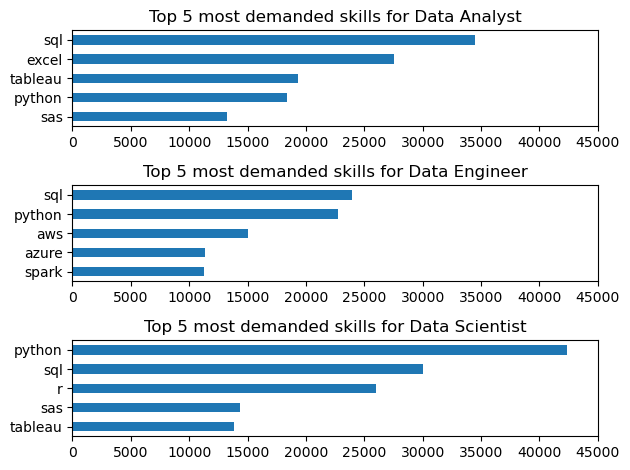

In [36]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_job_title = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
    df_job_title.plot(kind='barh', x='job_skills', y='Skill_count', ax=ax[i], legend=False)
    ax[i].invert_yaxis()
    ax[i].set_title(f'Top 5 most demanded skills for {job_title}')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 45000)

fig.tight_layout()
